In [11]:
import math
import heapq
from collections import deque
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import Polygon

# Problem 3.7
## Find the shortest path between two points on a plane with convex polygonal obstacles

1. Suppose the state space consists of all positions (x,y) in the plane. How many states are there? How many paths are there to the goal?

#### _Answer_
  - _The state space is defined as the set of nodes in a graph, represented as states, with their corresponding links being the actions that transition from one state to another._ 

    - _Given that the state space encompasses all (x, y) positions in the plane, and as a plane contains an infinite number of points, the state space itself contains an infinite number of points._ 

    - _**Since the state space is infinite, the number of states within it is also infinite**._

2. Explain briefly why the shortest path from one polygon vertex to any other in the scene must consist of straight-line segments joining some of the vertices of the polygons. Define a good state space now. How large is this state space? 

#### _Answer_
  - _Since the shortest path between two points in the presence of convex polygonal obstacles will always consist of straight-line segments between polygon vertices, the shortest path will always involve navigating as close to a straight line around the obstacles as possible. Therefore, an effective state space should include the vertices of the polygons, the start point, and the goal point._

3. Define the necessary functions to implement the search problem, including an function that takes a vertex as input and returns a set of vectors, each of which maps the current vertex to one of the vertices that can be reached in a straight line. (Do not forget the neighbors on the same polygon.) Use the straight-line distance for the heuristic function. 

4. Apply one or more of the algorithms in this chapter to solve a range of problems in the domain, and comment on their performance.

#### *Answer*
- `actions` *For each vertex, the available actions are to move along a straight line to any other vertex that can be reached without intersecting a polygon edge.*
- `result` *The result of an action is to move to the selected vertex*
- `goal_test` *Function to check if a state is the goal*
- `path_cost` *The cost of each action is the straight-line distance between vertices*
- `heuristic` *The heuristic is the straight-line distance from the current state to the goal*
- `intersects_polygon` *Function to check if a line segment intersects any obstacle edges*
- `intersects` *Function to check if two line segments intersect*
- `main` *a_star Function that performs the A* search*

Shortest path: [(0, 0), (8, 2), (10, 10)]


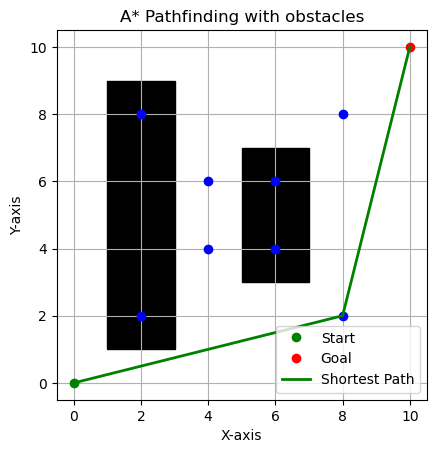

In [36]:
def actions(state, obstacles):
    for v in vertices + [start, goal]:
        if v != state and not intersects_polygon(state, v, obstacles):
            yield v

def result(state, action):
    return action

def goal_test(state, goal):
    return state == goal

def path_cost(state1, state2):
    return math.hypot(state1[0]-state2[0], state1[1]-state2[1])

def heuristic(state, goal):
    return math.hypot(state[0]-goal[0], state[1]-goal[1])

def intersects_polygon(state1, state2, obstacles):
    # Check if the line segment from state1 to state2 intersects any obstacle edges
    for obstacle in obstacles:
        for i in range(len(obstacle)):
            p1 = obstacle[i]
            p2 = obstacle[(i+1) % len(obstacle)]
            if intersects(state1, state2, p1, p2):
                return True
    return False

def intersects(p1, p2, p3, p4):
    # Check if line segments (p1, p2) and (p3, p4) intersect
    def ccw(a, b, c):
        return (c[1] - a[1]) * (b[0] - a[0]) > (b[1] - a[1]) * (c[0] - a[0])
    return ccw(p1, p3, p4) != ccw(p2, p3, p4) and ccw(p1, p2, p3) != ccw(p1, p2, p4)

def a_star(start, goal, obstacles):
    frontier = [(0, start, [])]
    explored = set()
    
    while frontier:
        (cost, state, path) = heapq.heappop(frontier)
        
        if state == goal:
            return path + [state]
        
        explored.add(state)
        
        for action in actions(state, obstacles):
            new_cost = cost + path_cost(state, action)
            new_path = path + [state]
            
            if action not in explored:
                heapq.heappush(frontier, (new_cost + heuristic(action, goal), action, new_path))
                
    return []

# Example usage
 
start = (0, 0)
goal = (10, 10)
vertices = [(2, 2), (2, 8), (8, 8), (8, 2), (4, 4), (4, 6), (6, 6), (6, 4)]
obstacles = [
    [(1, 1), (1, 9), (3, 9), (3, 1)],
    [(5, 3), (5, 7), (7, 7), (7, 3)],
]

# Run A* algorithm
path = a_star(start, goal, obstacles)
print("Shortest path:", path)

# Plotting
fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')

# Plot obstacles
for obstacle in obstacles:
    poly = Polygon(obstacle, closed=True, fill=True, color='black')
    ax.add_patch(poly)

# Plot vertices
for vertex in vertices:
    ax.plot(vertex[0], vertex[1], 'bo')

# Plot start and goal points
ax.plot(start[0], start[1], 'go', label='Start')
ax.plot(goal[0], goal[1], 'ro', label='Goal')

# Plot shortest path
path_x, path_y = zip(*path)
ax.plot(path_x, path_y, 'g-', linewidth=2, label='Shortest Path')

plt.legend()
plt.title('A* Pathfinding with obstacles')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

# Problem 3.9
## Missionaries and Cannibals problem

1. Formulate the problem precisely, making only those distinctions necessary to ensure a valid solution. Draw a diagram of the complete state space. 

#### *Answer*
*Initial State: Three missionaries, three cannibals, and the boat are on the left bank of the river.*
 
*Goal State: All three missionaries and three cannibals are on the right bank of the river.*
 
*Operators: The boat can carry one or two people from one bank to the other. The boat cannot move by itself.*
 
*Constraints: At no point should the number of cannibals on a specific bank outnumber the number of missionaries on that same bank. Otherwise, the cannibals will eat the missionaries.*
 
*State Space Diagram:*
 
*Explanation:*
*Here's a simplified representation of the state space:*
 
*Initial State: (3M, 3C, L)  --> (3M, 3C, R) : Goal State*
 
*L: Left Bank*
*R: Right Bank*
 
*Operators:*
1. *CC: Two cannibals cross from left to right.*
2. *C: One cannibal crosses from right to left.*
3. *MC: One missionary and one cannibal cross from left to right.*
4. *C: One cannibal crosses from right to left.*
5. *MC: One missionary and one cannibal cross from left to right.*
6. *C: One cannibal crosses from right to left.*
7. *CC: Two cannibals cross from left to right.*
8. *C: One cannibal crosses from right to left.*
9. *MC: One missionary and one cannibal cross from left to right.*

2. Implement and solve the problem optimally using an appropriate search algorithm. Is it a good idea to check for repeated states? 

#### *Answer*
*This problem can be optimally solved using a search algorithm such as Breadth-First Search (BFS) or Depth-First Search (DFS). BFS is often preferred because it guarantees the shortest path to the solution.*
 
*Checking for repeated states is essential to avoid infinite loops in the search process. Repeated states can occur when the same configuration of missionaries, cannibals, and boat positions is reached, thus creating an infinite back and forth.*
 
*To solve the Missionaries and Cannibals problem optimally, we'll use the Breadth-First Search (BFS) algorithm. BFS ensures that we find the shortest path to the goal state while avoiding any repeated states.*
 
*Here's a Python implementation:*
 


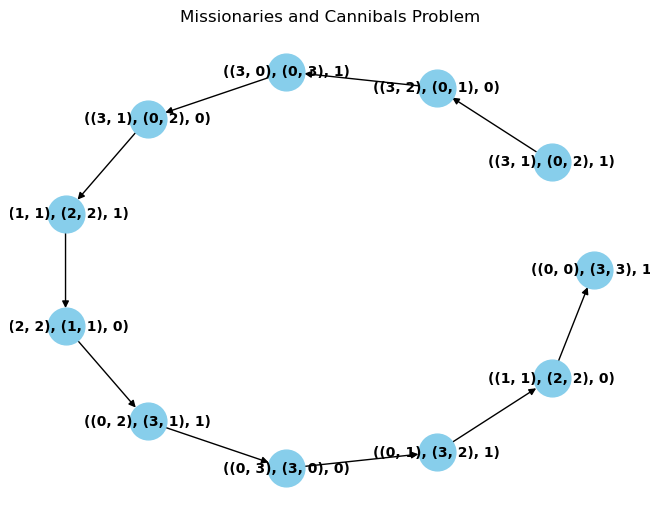

Optimal Solution:
Step 1: ((3, 1), (0, 2), 1)
Step 2: ((3, 2), (0, 1), 0)
Step 3: ((3, 0), (0, 3), 1)
Step 4: ((3, 1), (0, 2), 0)
Step 5: ((1, 1), (2, 2), 1)
Step 6: ((2, 2), (1, 1), 0)
Step 7: ((0, 2), (3, 1), 1)
Step 8: ((0, 3), (3, 0), 0)
Step 9: ((0, 1), (3, 2), 1)
Step 10: ((1, 1), (2, 2), 0)
Step 11: ((0, 0), (3, 3), 1)


In [10]:
# Variables
m = 3
c = 3

# Define the initial state and goal state
goal_state = ((0, 0), (m, c), 1)  # (Missionaries on left, Cannibals on left, Boat position)
initial_state = ((m, c), (0, 0), 0)  # (Missionaries on left, Cannibals on left, Boat position)

# Define a function to check if a state is valid
def is_valid(state):
    left, right, boat = state
    if left[0] < 0 or left[1] < 0 or right[0] < 0 or right[1] < 0:
        return False
    if left[0] < left[1] and left[0] > 0:  # More cannibals than missionaries on the left bank
        return False
    if right[0] < right[1] and right[0] > 0:  # More cannibals than missionaries on the right bank
        return False
    return True

# Define a function to generate next possible states
def generate_next_states(state):
    left, right, boat = state
    possible_states = []

    # Define the possible moves
    moves = [(2, 0), (0, 2), (1, 1), (1, 0), (0, 1)]

    # Loop through each possible move combination
    for move in moves:
        # Check the current position of the boat
        if boat == 0:
            # If the boat is on the left side of the river:
            # Calculate the new number of missionaries and cannibals on the left and right sides after the move
            new_left = (left[0] - move[0], left[1] - move[1])
            new_right = (right[0] + move[0], right[1] + move[1])
        else:
            # If the boat is on the right side of the river:
            # Calculate the new number of missionaries and cannibals on the left and right sides after the move
            new_left = (left[0] + move[0], left[1] + move[1])
            new_right = (right[0] - move[0], right[1] - move[1])

        # Create a new state representing the updated positions of missionaries and cannibals and the boat
        new_state = (new_left, new_right, 1 - boat)
        
        # Check if the new state is valid according to the problem constraints
        if is_valid(new_state):
            # If the new state is valid, add it to the list of possible next states
            possible_states.append(new_state)

    # Return the list of possible next states after all moves have been considered
    return possible_states


# Define the BFS function to find the solution
def bfs(initial_state, goal_state):
    visited = set()
    queue = deque([(initial_state, [])])

    while queue:
        state, path = queue.popleft()
        visited.add(tuple(state))  # Convert the state to a tuple before adding to set

        if state == goal_state:
            return path

        for next_state in generate_next_states(state):
            if tuple(next_state) not in visited:  # Convert the next_state to a tuple for comparison
                queue.append((next_state, path + [next_state]))

    return None

# Create a directed graph
G = nx.DiGraph()

# Add initial and goal states to the graph
G.add_node(goal_state)

# Find and add optimal path to the graph
optimal_path = bfs(initial_state, goal_state)
if optimal_path:
    for step, state in enumerate(optimal_path):
        if state not in G:
            G.add_node(state)
        if step > 0:
            G.add_edge(optimal_path[step - 1], state)

# Plot the graph
pos = nx.circular_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold")
plt.title("Missionaries and Cannibals Problem")
plt.show()

# Print the optimal solution
if optimal_path:
    print("Optimal Solution:")
    for step, state in enumerate(optimal_path):
        print(f"Step {step + 1}: {state}")
else:
    print("No solution found.")



*This code uses BFS to find the optimal path from the initial state to the goal state while avoiding repeated states. It checks the validity of states, generates next possible states, and maintains a queue to explore the state space.*
 
*Checking for repeated states is crucial to avoid infinite loops, as the problem space can lead to revisiting the same states.*
 
*When you run the code, it will print the steps required to move the missionaries and cannibals from the initial state to the goal state while adhering to the rules of the puzzle.*

3. Why do you think people have a hard time solving this puzzle, given that the state space is so simple? 

#### *Answer*
*People often find this puzzle challenging because it involves a complex interplay of multiple constraints: maintaining the safety of the missionaries, preventing the cannibals from outnumbering the missionaries on either side and efficiently using the boat's capacity.*
 
*While the state space itself is simple to represent, the constraints and the need for a valid solution make it a non-trivial problem to solve manually. This puzzle requires careful planning and adherence to the defined rules to find a solution without violating any constraints.*

*In summary, the simplicity of the state space masks the complexity of the constraints and rules involved, making the missionaries and cannibals problem a classic puzzle in artificial intelligence and problem-solving.*